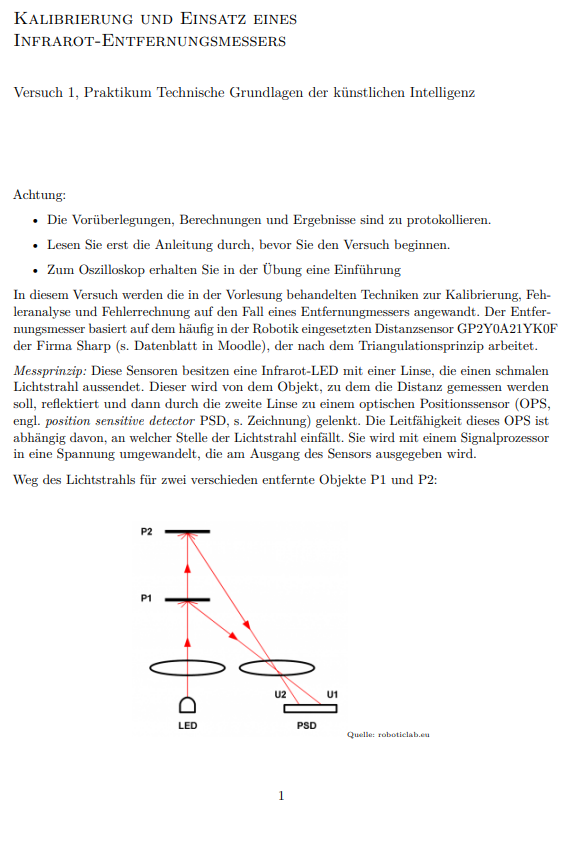

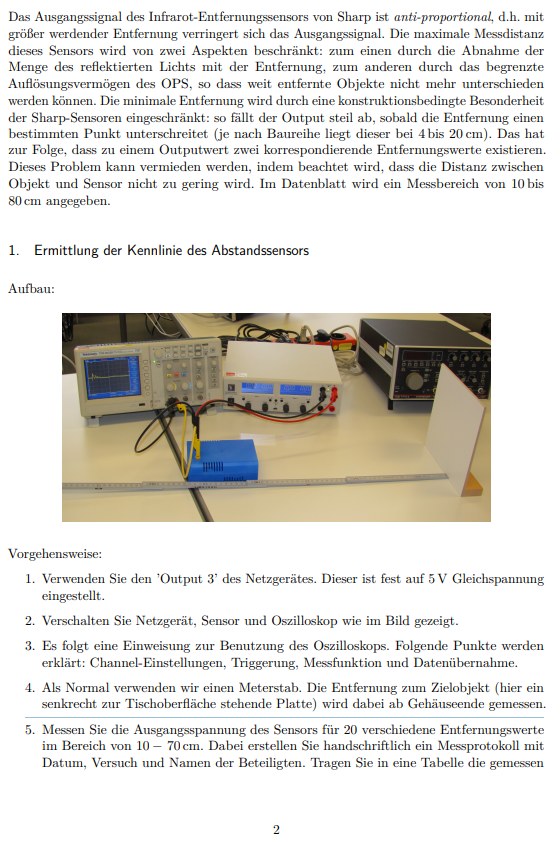

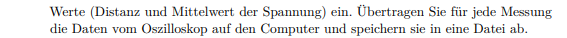

__Messprotokoll__

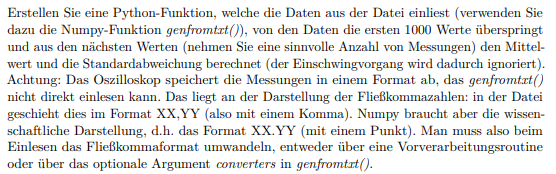

In [208]:
import numpy as np
import matplotlib.pyplot as plt

In [209]:
def conv(x):
    return float(x.replace(',', '.'))

def rechne(): liest die Datei messung.csv ein und speichert die Daten als 2D-Array in data

'messung.csv'	Dateiname (die Messdatei)

delimiter=','	Spalten sind durch Komma getrennt

skip_header=1	erste Zeile (z. B. Spaltennamen) wird übersprungen

autostrip=True           # entfernt Leerzeichen um Werte herum

max_rows                Liest nur n Zeilen nach skip_header ein

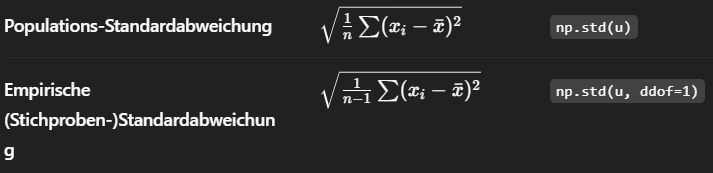

In [210]:
def rechne(messungsdatei):
    # CSV einlesen (überspringe Header)
    # data = np.array()
    data = np.genfromtxt(
        messungsdatei, 
        delimiter=';', 
        skip_header=1000, # n+1 - skip_header
        converters={0: conv, 1: conv},
        autostrip=True,          # entfernt Leerzeichen um Werte herum
        max_rows = 200
    )
    
    # Zeit und Spannung extrahieren (ARRAYS)
    t = np.abs(data[:, 0])   # erste Spalte: Zeit
    u = data[:, 1]  # zweite Spalte: Spannung
    
    # Mittelwert 
    spannungMittelwert = np.mean(u)  #sum(u)/len(u)
    
    # Standardabweichung
    standardAbweichungU = np.std(u)
    
    # Empirische Standardabweichung
    emstandardAbweichungU  = np.std(u, ddof=1)       # ddof=1 → delta degrees of freedom = 1
                                # bedeutet: teile durch n-1
    return t, u, spannungMittelwert, standardAbweichungU, emstandardAbweichungU

    
    
    

In [211]:
def plottCsv(spezifizierung, t, u, spannungMittelwert, standardAbweichungU, emstandardAbweichungU):
        # daten plotten
    plt.figure(figsize=(8,4))
    #plott
    
    plt.plot(t, u, label='Signal', color='blue')
    # Mittelwert-Linie 
    # plt.axhline() gehört zu Matplotlib
    # und wird verwendet, um eine horizontale Linie in ein Diagramm zu zeichnen.
    plt.axhline(spannungMittelwert, 
                color='green', 
                linestyle='--', 
                label=f'mean = {spannungMittelwert:.3f} V')
    # Standardabweichungslinien
    plt.axhline(spannungMittelwert + standardAbweichungU, 
                color='red', 
                linestyle='-', 
                label=f'std +1σ = {spannungMittelwert + standardAbweichungU:.3f} V')
    plt.axhline(spannungMittelwert - standardAbweichungU, 
                color='red', 
                linestyle='-', 
                label=f'std -1σ = {spannungMittelwert - standardAbweichungU:.3f} V')
    
    # empirischeStandardabweichungslinien
    plt.axhline(spannungMittelwert + emstandardAbweichungU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd +1σ = {spannungMittelwert + emstandardAbweichungU:.3f} V')
    plt.axhline(spannungMittelwert - emstandardAbweichungU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd -1σ = {spannungMittelwert - emstandardAbweichungU:.3f} V')
    
    plt.title(f"Oszilloskop-Messung {spezifizierung}")
    plt.xlabel("Zeit [s]")
    plt.ylabel("Spannung [V]")
    plt.grid(True)
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()
    

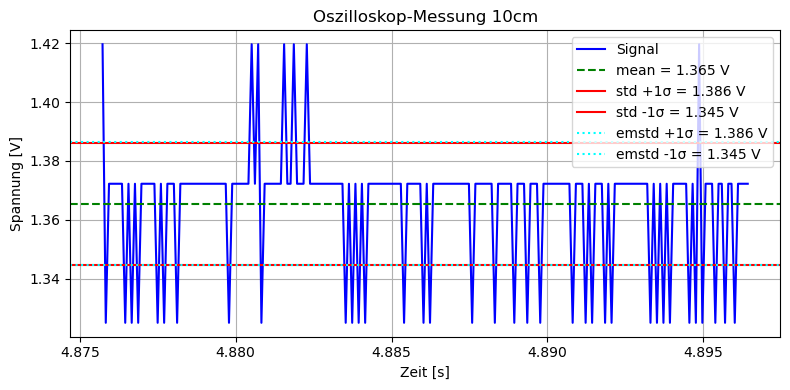

In [212]:
#Bsp. Plott 10cm
cm=10
t, u, uM, stdu, emstd= rechne(f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv")        
plottCsv("10cm", t, u,  uM, stdu, emstd)

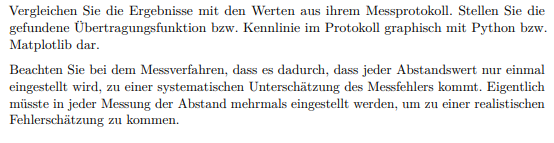

In [213]:

def plotCMstep(spezifizierung, handmesswerte):
    plt.figure(figsize=(8,4))
    wertindex = 0
    for i in range(10, 70, 3):   
        cm=i       
        t, u, uM, stdu, emstd= rechne(f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv")
        for j in range(len(u)):
            if(j==0 and cm==10):
                plt.plot(cm, u[j], ".", color = "cyan", label = 'Osz-werte in V')      
            else:
                plt.plot(cm, u[j], ".", color = "cyan")  
        if (wertindex==0):
            plt.plot(cm, handmesswerte[wertindex], "o", color="magenta",label='Handmesswerte')
            plt.plot(cm, uM,".", color='black', label='Spannungsmittelwert')
            #plt.plot(cm, uM-emstd,".", color='orange', label=f"emstd -1σ: {(uM-stdu):.3f}") 
        else:    
            plt.plot(cm, handmesswerte[wertindex], "o", color="magenta")
            plt.plot(cm, uM,".", color='black')
            #plt.plot(cm, uM-emstd,".", color='orange') 
        wertindex= wertindex+1


    plt.title(f"Oszilloskop-Messung {spezifizierung}")
    plt.xlabel("Zeit [s]")
    plt.ylabel("Spannung [V]")
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    

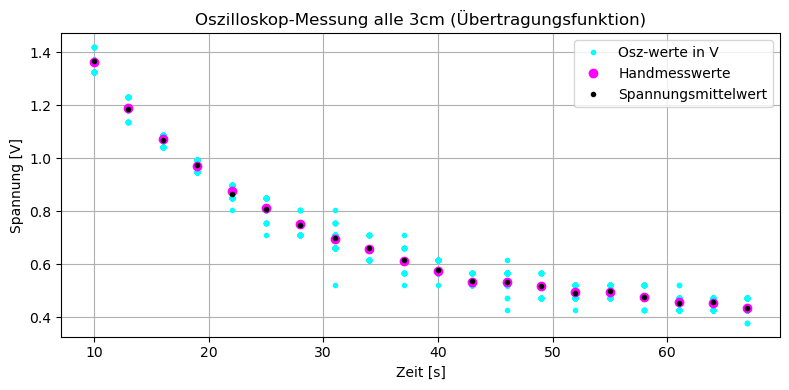

In [214]:

handmesswerte   = [1.364, 1.188, 1.071, 0.971, 0.875, 0.812, 
                   0.752, 0.696, 0.656, 0.614, 0.576, 0.533,
                   0.534, 0.518, 0.497, 0.494, 0.476, 0.458,
                   0.452, 0.433, 0.414]
dinA4 = [0.710, 0.900]

def vergleiche(handmesswerte):
    plotCMstep("alle 3cm (Übertragungsfunktion)", handmesswerte)

vergleiche(handmesswerte)

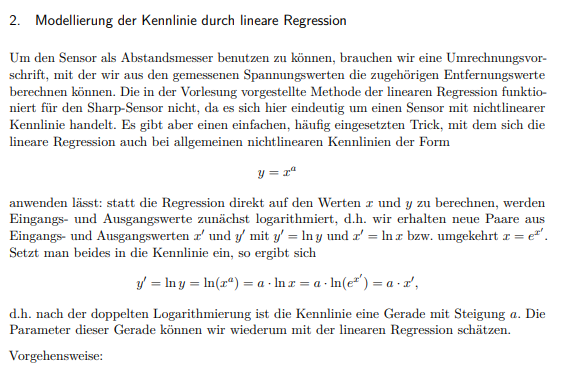

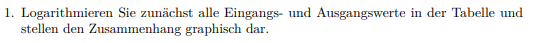

In [ ]:
def logarythmierAll(): 
    for i in range(10,70,3):
        t, u, uM, stdu, emstd= rechne(f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv")
        xStrich=np.log(u)
        yStrich=np.log(cm)

logarythmier()      

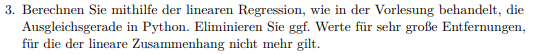

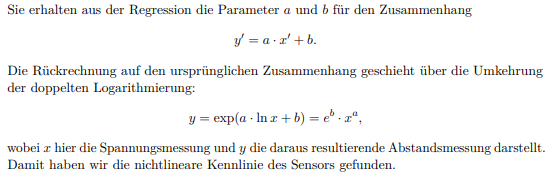

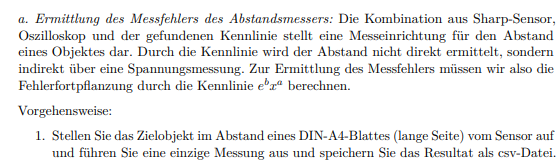

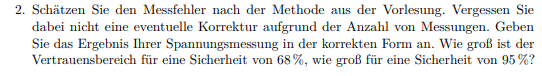

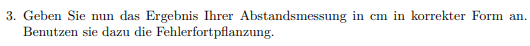

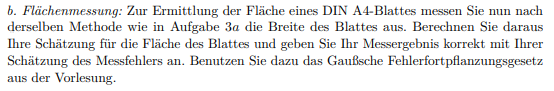